## Indian Premier League (IPL) Regression Analysis

In [ ]:
%%capture
# Due to the configuration of the base Jupter image, the following imports are required for the regressions in the assignment to report the correct metrics

import sys 
!{sys.executable} -m pip uninstall statsmodels --yes 
!{sys.executable} -m pip uninstall numpy --yes
!{sys.executable} -m pip uninstall pandas --yes 
!{sys.executable} -m pip uninstall patsy --yes 
!{sys.executable} -m pip install numpy==1.17
!{sys.executable} -m pip install pandas==1.0
!{sys.executable} -m pip install patsy==0.5.2
!{sys.executable} -m pip install statsmodels==0.11.1

In [1]:
# As usual, we begin by loading the packages we will need

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
# Now we load the data

IPL=pd.read_excel("Data\IPL (assignment) data.xlsx")

In [18]:
pd.set_option('display.max_rows', None)

In [3]:
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000


In [4]:
IPL.describe()

,year,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,2012.945652,14.391304,7.076087,7.076087,0.239130,14.391304,0.001772,0.119565,0.119565,0.097826,0.086957,7.110445e+06
std,3.125099,0.797751,2.195068,2.164822,0.477391,4.332237,0.519739,0.326230,0.326230,0.298707,0.283315,2.663266e+06
min,2008.000000,14.000000,2.000000,3.000000,0.000000,4.000000,-1.436000,0.000000,0.000000,0.000000,0.000000,1.725000e+06
25%,2010.000000,14.000000,6.000000,5.000000,0.000000,12.000000,-0.343750,0.000000,0.000000,0.000000,0.000000,5.178750e+06
50%,2013.000000,14.000000,7.000000,7.000000,0.000000,14.000000,0.018000,0.000000,0.000000,0.000000,0.000000,6.809583e+06
75%,2016.000000,14.000000,9.000000,8.000000,0.000000,18.000000,0.323000,0.000000,0.000000,0.000000,0.000000,9.286749e+06
max,2018.000000,16.000000,11.000000,13.000000,2.000000,22.000000,1.084000,1.000000,1.000000,1.000000,1.000000,1.334500e+07


In [5]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        92 non-null     int64  
 1   team        92 non-null     object 
 2   played      92 non-null     int64  
 3   won         92 non-null     int64  
 4   lost        92 non-null     int64  
 5   noresult    92 non-null     int64  
 6   points      92 non-null     int64  
 7   netrunrate  92 non-null     float64
 8   champions   92 non-null     int64  
 9   runnersup   92 non-null     int64  
 10  third       92 non-null     int64  
 11  fourth      92 non-null     int64  
 12  salaries    92 non-null     int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 9.5+ KB


In [6]:
#Summing all teams salaries for each years
Sumsal = IPL.groupby(['year'])['salaries'].sum().reset_index().rename(columns = {'salaries': 'allsal'})
Sumsal

,year,allsal
0,2008,34105000
1,2009,33445000
2,2010,33075000
3,2011,62210000
4,2012,59706250
5,2013,81535000
6,2014,73973332
7,2015,65242665
8,2016,63483666
9,2017,63014833


In [7]:
#Adding the sum of all salaries
IPL = pd.merge(IPL, Sumsal, on = ['year'], how = 'left')
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250


In [8]:
#Creating the relative salary variable
IPL['relsal'] = IPL['salaries'] / IPL['allsal']
IPL.head()

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314


In [9]:
#win percentage variable
IPL['win_pct'] = IPL['won'] / (IPL['played'] - IPL['noresult'])

In [11]:
IPL.sort_values(by = ['team','year'], ascending = True)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,win_pct
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014,Sunrisers Hyderabad,14,6,8,0,12,-0.399,0,0,0,0,9803333,73973332,0.132525,0.428571
88,2015,Sunrisers Hyderabad,14,7,7,0,14,-0.239,0,0,0,0,8104667,65242665,0.124223,0.500000
89,2016,Sunrisers Hyderabad,14,8,6,0,16,0.245,1,0,0,0,8747666,63483666,0.137794,0.571429
90,2017,Sunrisers Hyderabad,14,8,5,1,17,0.599,0,0,0,1,8200500,63014833,0.130136,0.615385


Text(0.5, 1.0, 'Winning Percentage vs Relative Salaries')

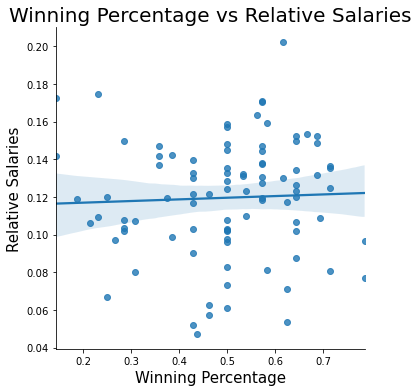

In [29]:
#Regression plot for win percentage ver relative salary
sns.lmplot(x = 'win_pct', y = 'relsal', data = IPL)
plt.xlabel('Winning Percentage', fontsize = 15)
plt.ylabel('Relative Salaries', fontsize = 15)
plt.title('Winning Percentage vs Relative Salaries', fontsize = 20)

Text(0.5, 1.0, 'Winning Percentage vs Relative Salaries')

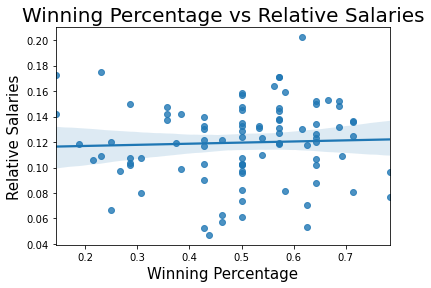

In [30]:
#Regression plot for win percentage and relative salary
sns.regplot(x = 'win_pct', y = 'relsal', data = IPL)
plt.xlabel('Winning Percentage', fontsize = 15)
plt.ylabel('Relative Salaries', fontsize = 15)
plt.title('Winning Percentage vs Relative Salaries', fontsize = 20)

In [ ]:
IPL['lag_win_pct'] = IPL.groupby(['team'])['win_pct'].shift(1)
IPL

Text(0.5, 1.0, 'Lagged Winning Percentage vs Relative Salaries')

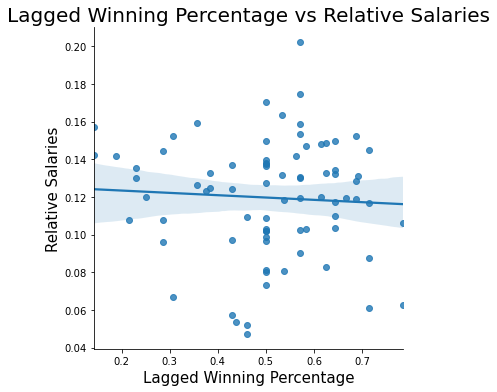

: 

In [31]:
#Regression plot for lagged win percentage and relative salary
sns.lmplot(x = 'lag_win_pct', y = 'relsal', data = IPL)
plt.xlabel('Lagged Winning Percentage', fontsize = 15)
plt.ylabel('Relative Salaries', fontsize = 15)
plt.title('Lagged Winning Percentage vs Relative Salaries', fontsize = 20)

In [13]:
#Regression for Relsal
reg1 = smf.ols(formula = 'win_pct ~ relsal', data = IPL).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1622
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.688
Time:                        19:18:25   Log-Likelihood:                 45.259
No. Observations:                  92   AIC:                            -86.52
Df Residuals:                      90   BIC:                            -81.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4752      0.063      7.563      0.0

In [15]:
#Regression for relsal + lag_win_pct
reg2 = smf.ols(formula = 'win_pct ~ relsal + lag_win_pct', data = IPL).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.591
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.210
Time:                        19:22:59   Log-Likelihood:                 43.314
No. Observations:                  79   AIC:                            -80.63
Df Residuals:                      76   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3489      0.087      4.003      

In [22]:
#Regression for relsal + lag_win_pct + teams fixed effects
reg3 = smf.ols(formula = 'win_pct ~ relsal + lag_win_pct + C(team)', data = IPL).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.117
Date:                Fri, 18 Nov 2022   Prob (F-statistic):             0.0245
Time:                        19:32:35   Log-Likelihood:                 55.639
No. Observations:                  79   AIC:                            -83.28
Df Residuals:                      65   BIC:                            -50.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------